In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
dataset = "../data/rainfall.csv"

In [3]:
df = pd.read_csv(dataset)
df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
df.shape

(4116, 19)

In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [6]:
df.columns

Index(['DIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [7]:
df.isnull().sum()

DIVISION     0
YEAR         0
JAN          4
FEB          3
MAR          6
APR          4
MAY          3
JUN          5
JUL          7
AUG          4
SEP          6
OCT          7
NOV         11
DEC         10
ANNUAL      26
Jan-Feb      6
Mar-May      9
Jun-Sep     10
Oct-Dec     13
dtype: int64

In [8]:
df = df.dropna()

df.isnull().sum()

DIVISION    0
YEAR        0
JAN         0
FEB         0
MAR         0
APR         0
MAY         0
JUN         0
JUL         0
AUG         0
SEP         0
OCT         0
NOV         0
DEC         0
ANNUAL      0
Jan-Feb     0
Mar-May     0
Jun-Sep     0
Oct-Dec     0
dtype: int64

In [9]:
df.dtypes

DIVISION     object
YEAR          int64
JAN         float64
FEB         float64
MAR         float64
APR         float64
MAY         float64
JUN         float64
JUL         float64
AUG         float64
SEP         float64
OCT         float64
NOV         float64
DEC         float64
ANNUAL      float64
Jan-Feb     float64
Mar-May     float64
Jun-Sep     float64
Oct-Dec     float64
dtype: object

In [10]:
le = LabelEncoder()
df['DIVISION'] = le.fit_transform(df['DIVISION'])
df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [11]:

X = df.drop(['ANNUAL'], axis=1)
y = df['ANNUAL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
y_pred_pr = pr.predict(X_test_poly)

# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Random Forest Regression
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Evaluate performance
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr), "R^2:", r2_score(y_test, y_pred_lr))
print("Polynomial Regression - MSE:", mean_squared_error(y_test, y_pred_pr), "R^2:", r2_score(y_test, y_pred_pr))
print("Ridge Regression - MSE:", mean_squared_error(y_test, y_pred_ridge), "R^2:", r2_score(y_test, y_pred_ridge))
print("Random Forest Regression - MSE:", mean_squared_error(y_test, y_pred_rfr), "R^2:", r2_score(y_test, y_pred_rfr))


Linear Regression - MSE: 0.0030563202960957746 R^2: 0.9999999964690865
Polynomial Regression - MSE: 0.0032460558220110476 R^2: 0.9999999962498884
Ridge Regression - MSE: 0.0030573463708802847 R^2: 0.9999999964679012
Random Forest Regression - MSE: 7955.47588332761 R^2: 0.9908091776531543


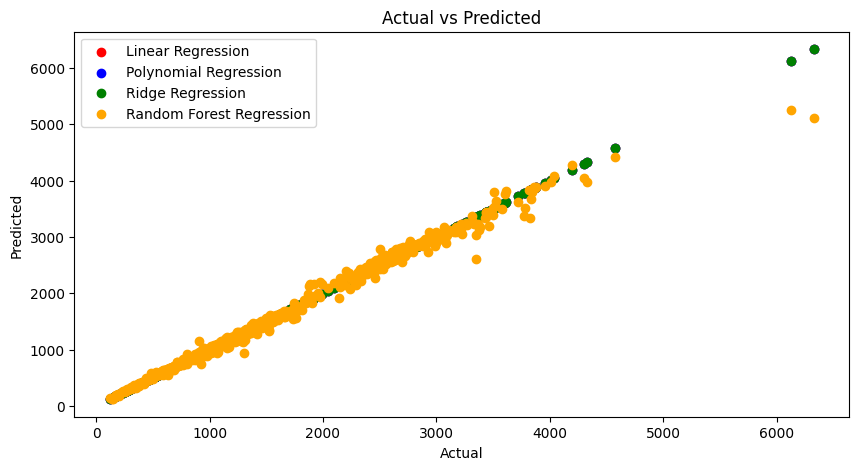

In [26]:
# plot the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, color='red', label='Linear Regression')
plt.scatter(y_test, y_pred_pr, color='blue', label='Polynomial Regression')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.scatter(y_test, y_pred_rfr, color='orange', label='Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()